# Titanic: Machine Learning from disaster


**Datos**: Titanic (https://www.kaggle.com/c/titanic/data)

**Problema**: El objetivo es explorar los datos hasta conseguir la mejor predicción posible acerca de quién sobrevivirá y quien no al famoso accidente. (https://youtu.be/8yZMXCaFshs)

# Contenido del Notebook:

#### Parte 1: Exploratory Data Analysis(EDA)
1.1)Analisis univariante y multivariante

#### Parte 2: Feature Engineering and Data Cleaning
2.1)Creación de nuevas variables

2.2)Selección de variables

2.3)Transformaciones de variables previas al modelado

#### Parte 3: Clustering
3.1)K-means

3.2)Clustering jerárquico

3.3)DBSCAN

#### Parte 4: Modelos de clasificación
4.1)Regresión logística

4.2)Árbol de decisión

4.3)Naive Bayes

4.4)Random Forest

4.5) Xgboost

#### Parte 5: Medición
5.1)Matriz de confusión

5.2)AUC

# Parte 1: Exploratory Data Analysis(EDA)

A lo largo de esta primera parte veremos ejemplos de distintas métricas y gráficos con los que podemos explorar nuestros datos. 

Representaremos la misma información de distintas formas, para disponibilizar varias opciones, entender bien las diferencias y poder elegir, en función de las necesidades, el mejor gráfico.

Trabajaremos con matplotlib (https://matplotlib.org) y seaborn (https://seaborn.pydata.org/index.html) como librerias para gráficos.

Cargamos las librerías necesarias:

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import xgboost as xg

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Cargamos el dataset:

(Método específico para Google Colab, dependiendo de nuestro entorno de trabajo aquí podríamos necesitar cargar un csv en nuestra propia máquina o, por ejemplo, establecer la conexión con una base de datos)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
import io 
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Echemos un vistazo a los datos:

(Sentencia similar a un select * con limit 5)

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora chequearemos la cantidad de valores nulos que aparecen en las variables:

In [0]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Las variables **Age, Cabin and Embarked**, deberemos imputarlos.

### Ratio de target: ¿Cuántos sobrevivieron?

Para realizar mas de un gráfico dentro del mismo plot usaremos subplots (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html), en los comentarios podemos ver la función de cada sentencia.

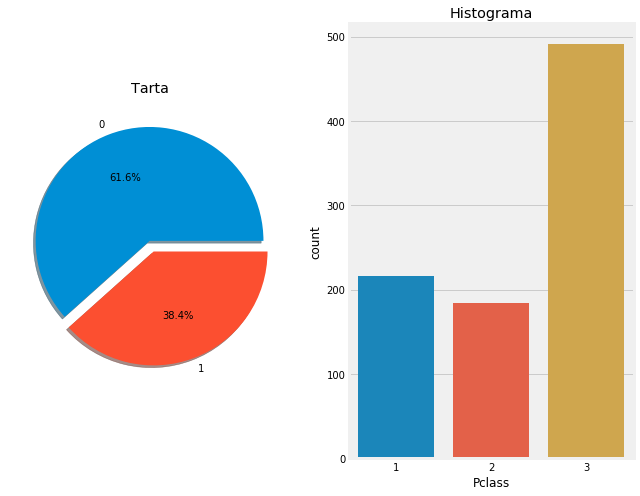

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,8)) # Inicializamos la figura, con el primer y segundo parámetro fijamos el número de filas y columnas. 
# Figsize nos permite también fijar el tamaño de nuestro gráfico

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) #Representamos en un gráfico de tartas el conteo de los supervivientes
# Importante notar que el parámetro ax=ax[0] nos permite asignar la posición del gráfico dentro del subplot (en este caso solo una coordenada basta)

ax[0].set_title('Tarta') # Fiajmos el título del gráfico
ax[0].set_ylabel('') # Asignamos la etiqueta al eje y

sns.countplot('Survived',data=data,ax=ax[1]) # Representamos el histograma, asignandolo a la otra posición del subplot
ax[1].set_title('Histograma')

plt.show()

## Tipos de variables:

### Variables categóricas:


**Variables categóricas en el dataset: Sex,Embarked.**

### Variables ordinales:


**Variables ordinales en el dataset: PClass**

### Variables continuas:


**Variables continuas en el dataset: Age**

## 1.1 Análisis univariante y multivariante

### Sex

Usando groupby (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) y la función count podemos obtener el número de supervivientes y no supervivientes por género:

In [0]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Representemos ahora gráficamente estos números:

(Comentaremos los detalles específicos de este gráfico, varias de las sentencias y funciones han sido explicadas en el primer gráfico de este tipo)

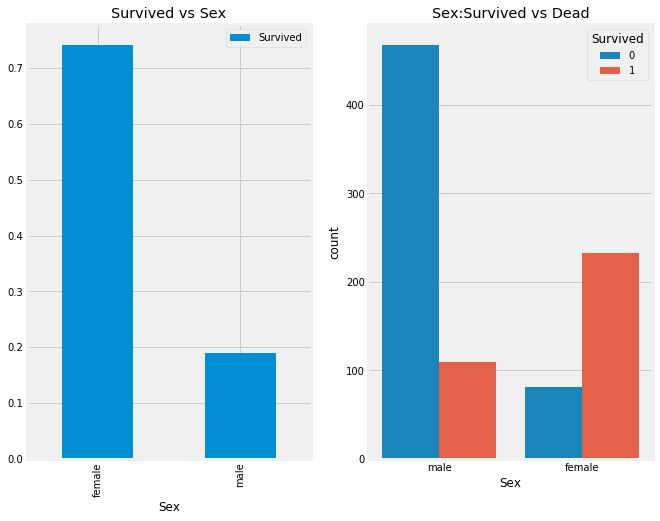

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) # Calculamos el ratio de supervivientes por género (podemos usar la media pues es una variable 1/0)
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

### Pclass

Estudiemos ahora las proporciones de supervivientes en función de la clase en la que viajaban:

Usaremos la funcion crosstab (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [0]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Y lo representamos gráficamente:

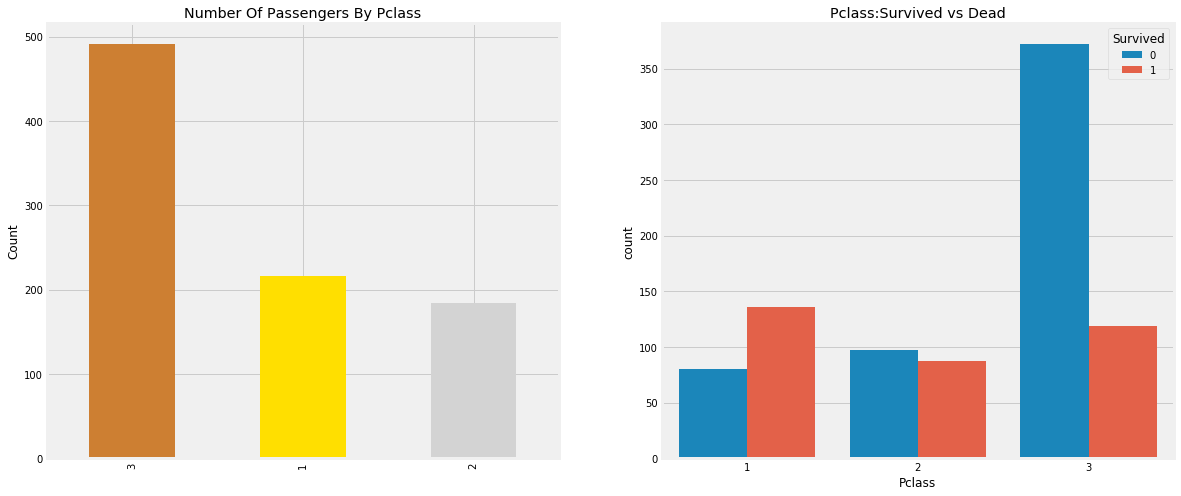

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

Podemos incluso usar la función crosstab para combinar en la misma matriz la combinación de 3 variables distintas:

In [0]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Ahora representaremos estos ratios de supervivientes de una forma alternativa usando el gráfico factorplot (https://seaborn.pydata.org/generated/seaborn.catplot.html) dentro de la librería seaborn (https://seaborn.pydata.org) 

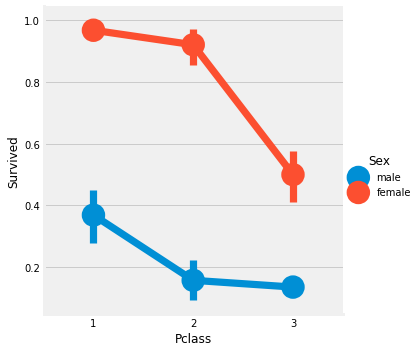

In [0]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Age

Ahora podemos representar algunas métricas básicas, tomaremos como ejemplo la variable edad:

In [0]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Otro tipo de gráfico interesante son los violinplot (https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot). Usaremos de nuevo la edad, clase y la variable objetivo para estos gráficos:

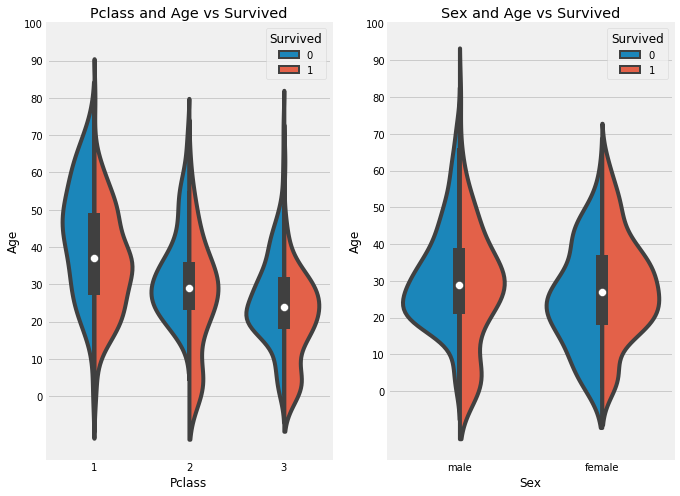

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,8))

sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

También existe la posibilidad de solapar dos gráficos dentro de la misma imagen, dando una visión mas completa de la información.

En este caso vemos como unir un boxplot y un scatterplot:

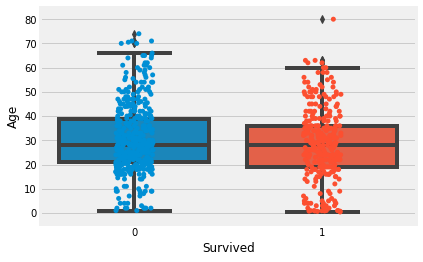

In [0]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=data)

ax = sns.stripplot(x="Survived", y="Age",
                   data=data, jitter=True,
                   edgecolor="gray")

Veamos también cómo representar el histograma de una variable contínua, en este caso la edad, en función de la variable objetivo:

Nota1: El parámetro bins establece el número de "barras" que tendrá el histograma. Cuanto mayor sea mayor nivel de detalle sobre la distribución, aunque debemos tener cuidado de que cada bin contega una cantidad suficiente de observaciones. El tamaño de la muestra que estemos usando limita por lo tanto el número de bins que podemos usar.

Nota2: La función range(a,b,p) genera una lista de números del valor a al b dando pasos de tamaño p. La usaremos para fijar el tamaño de nuestro eje x, es imprescindible (si no se desea que la función lo asigne automáticamente) que adaptemos estos valores a la variable que estemos representando.

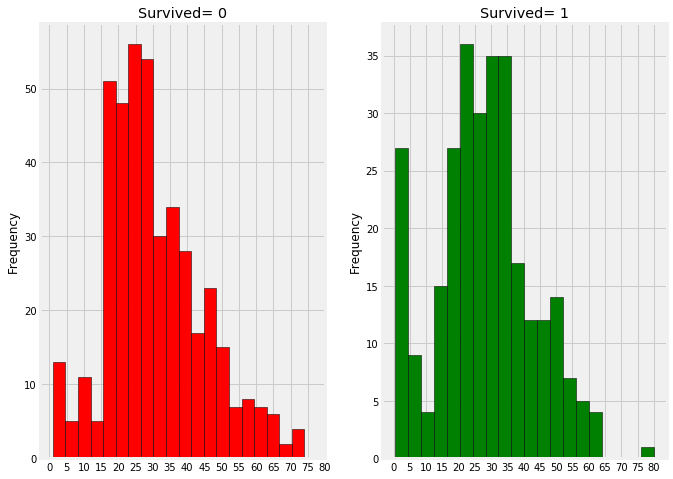

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,8))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

### Embarked

Podemos ahora estudiar las diferencias en función del puerto de embarque:

In [0]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Y estudiar su combinación con otras variables como género, clase o la variables objetivo (Survived):

Nota: En este caso usaremos un subplot de tamaño 2x2 (plt.subplots(**2,2**,figsize=(10,8))), la única diferencia con los ejemplo anteriores es que utilizaremos dos coordenadas al asignar ax (por ejemplo, ax=ax[**0,1**])

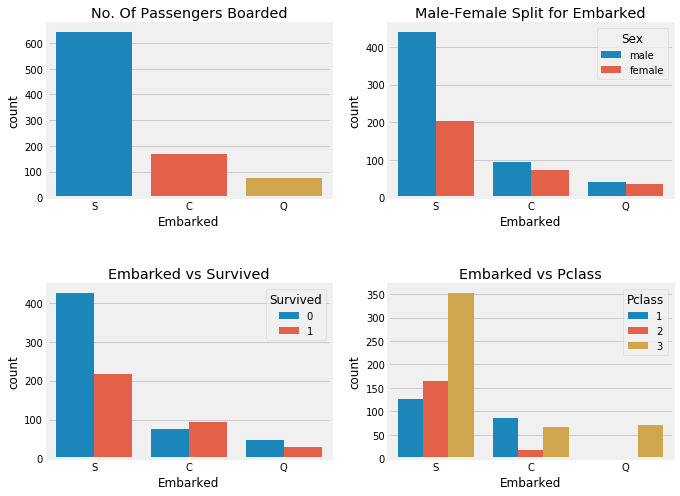

In [0]:
f,ax=plt.subplots(2,2,figsize=(10,8))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

De nuevo un ejemplo de factorplot teniendo en cuenta el puerto de embarque:

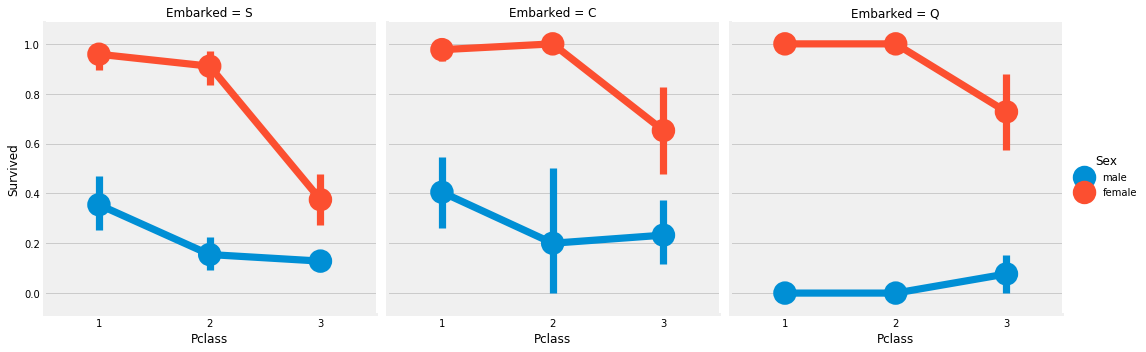

In [0]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### SibSip

Estudiemos también otras variables como SibSip (SibSip = Number of Siblings/Spouses Aboard):

In [0]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [0]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

O la variable Parch (Parch = Number of Parents/Children Aboard):

In [0]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### Fare

En función del precio del billete también podemos encontrar diferencias interesantes:

In [0]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


En este caso usaremos el gráfico distplot dentro de seaborn, que combina el histograma con una estimación de la función densidad (https://seaborn.pydata.org/generated/seaborn.distplot.html), para representar las diferencias entre el precio del billete en función de la clase en la que viajan:

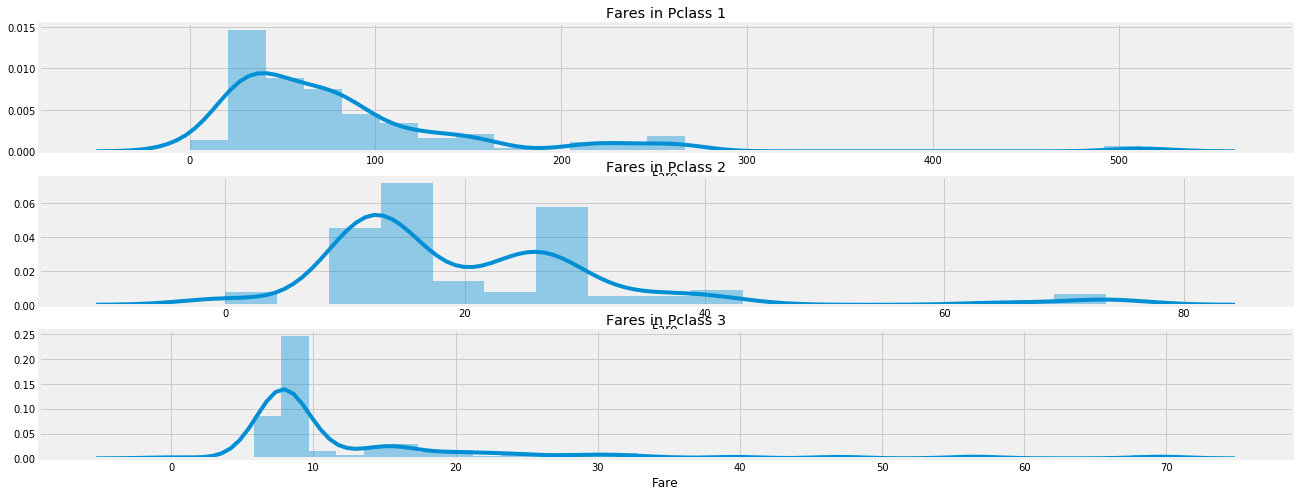

In [0]:
f,ax=plt.subplots(3,1,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### Análisis de correlaciones

Una forma muy interesante de representar la matriz de correlaciones (data.corr()) es usar un heatmap (https://seaborn.pydata.org/generated/seaborn.heatmap.html):

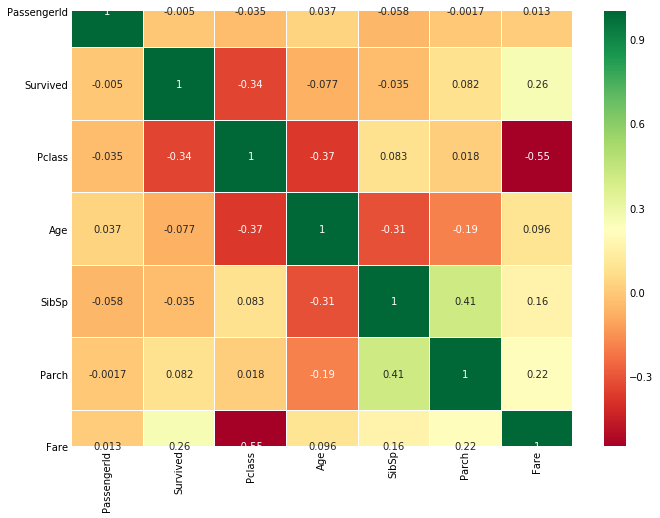

In [0]:
fig=plt.gcf()

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)

fig.set_size_inches(10,8)

plt.show()

### Relación entre Fare, Age, Pclass y Survived

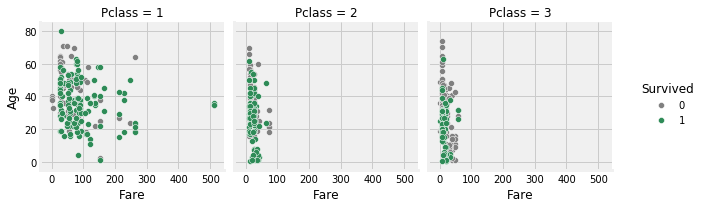

In [0]:
g = sns.FacetGrid(data, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

### Distribución de la edad por clases

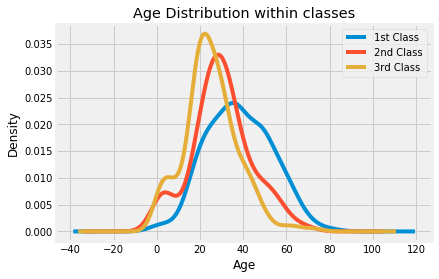

In [0]:
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

# Parte 2: Feature Engineering and Data Cleaning

## 2.1 Creación de nuevas variables

### Imputación de valores missing

Procedamos ahora a localizar y sustituir los valores missing dentro de nuestras variables:

In [0]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Por ejemplo, para la variable edad sustituiremos los valores missing por la media de edad de la muestra:

In [0]:
data['Age'][data['Age'].isnull()] = np.mean(data['Age'])

En cambio, podemos añadir un nuevo nivel dentro de las variables categóricas que contemple específicamente los valores desconocidos:

In [0]:
data['Cabin'][data['Cabin'].isnull()] = "Desconocido"
data['Embarked'][data['Embarked'].isnull()] = "Desconocido"

### Rangos de edad

Otra operación bastante común es la tramificación de variables, en este caso crearemos una nueva variable categórica a partir de distintos rangos de edad:

In [0]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconocido,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [0]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,523
2,188
0,100
3,69
4,11


### Rango de precios del billete

Otra forma de realizar la tramificación es usar intervalos equidistantes con la función qcut (en el ejemplo, 4 cuts, estaremos separamos por cuartiles):

In [0]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
data['Fare_cat']=0
data.loc[data['Fare']<=8,'Fare_cat']=0
data.loc[(data['Fare']>8)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

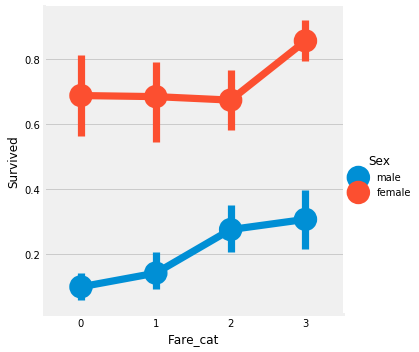

In [0]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

### Converting String Values into Numeric

Otra operación que deberemos abordar en algún momento es la sustitución de variables categóricos por equivalentes numéricos. En este caso sustituremos los dos tipos de género por los valores 0 y 1:

In [0]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)

**Nota:** Esta práctica concreta de transformación de categóricas a numéricas es una **simplificación** que en muchos casos es **errónea** (por ejemplo, si las categorías no tienen ningún tipo de ordinalidad). Es altamente recomendable usar otro tipo de técnicas como la **codificación por impacto** o, alternativamente, usar **one-hot encoding**.

### Selección de variables

**Name**: Es un identificador, no tiene valor de cara al modelado

**Age**: Puede ser sustituida por la variables categórica de rangos de edad

**Ticket**: Es un identificador, no tiene valor de cara al modelado

**Fare**: Puede ser sustituida por la variables categórica fare_cat

**Fare_Range**: Puede ser sustituida por la variables categórica fare_cat

**PassengerId**: Es un identificador, no tiene valor de cara al modelado

Una técnica común de selección de variables, o al menos para descartar algunas, es realizar un estudio de las correlaciones y eliminar una variable de cada par de variables altamente correladas:

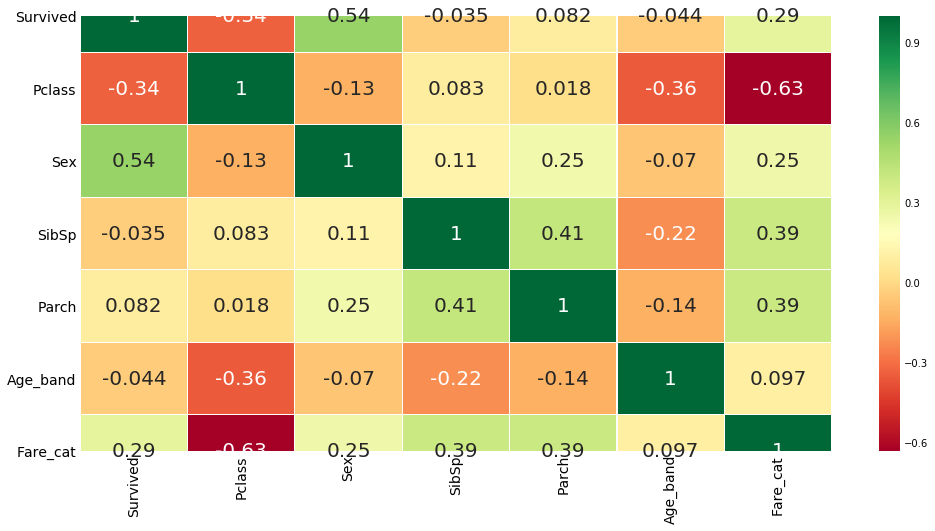

In [0]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Parte 3: Clustering

Chequeamos primeros el tipo de variables, ya que para algunas de las técnincas de clustering que vamos a usar necesitamos solo variables numéricas:

In [0]:
data.dtypes

Survived     int64
Pclass       int64
Sex          int64
SibSp        int64
Parch        int64
Embarked    object
Age_band     int64
Fare_cat     int64
dtype: object

Podemos entonces ahora seleccionar las variables que queramos usar para clusterizar:

In [0]:
selected_vars = ['Sex', 'SibSp', 'Parch']

X = np.array(data[selected_vars]).astype(float)
y = np.array(data['Survived'])

Es importante tener en cuenta algunas transformaciones de variables numéricas como el reescalado(MinMaxScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html, StandarScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [0]:
scaler = MinMaxScaler()
scaler2 = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3.1 K-means

Usaremos primero el algortirmo Kmeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Para el desarrollo de una clusterización tendremos comumente las siguientes fases:

1) Inicialización del cluster, selección de parámetros

2) Ajuste (.fit)

3) Asignación del cluster correspondiente a cada observación

4) Entendimiento de cada cluster (por ejemplo, analizando las coordenadas de los centroides)

5) Ratios de la variable objetivo por cluster, para entender si, por ejemplo, hay algunos cluster con mayor posibilidad de supervivencia

### Variables originales:

In [0]:
kmeans = KMeans(n_clusters=5) # Inicialización

kmeans_fitted = kmeans.fit(X)

In [0]:
data['Cluster_Kmeans'] = kmeans_fitted.predict(X)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat,Cluster_Kmeans
0,0,3,0,1,0,S,1,0,4
1,1,1,1,1,0,C,2,3,4
2,1,3,1,0,0,S,1,0,2
3,1,1,1,1,0,S,2,3,4
4,0,3,0,0,0,S,2,1,0


In [0]:
kmeans_fitted.cluster_centers_

NameError: ignored

In [0]:
data.groupby(['Cluster_Kmeans','Survived'])['Survived'].count()

Cluster_Kmeans  Survived
0               0           357
                1            68
1               0            39
                1             5
2               0            30
                1           120
3               0            28
                1            39
4               0            95
                1           110
Name: Survived, dtype: int64

### Variables reescaladas:

Es importante tener en cuenta que las transformaciones que efectuemos sobres las variables afectan significativamente en las conclusiones. Veamos por ejemplo qué pasaría si hacemos el clustering con las variables reescaladas:

In [0]:
kmeans_fitted_rescaled = kmeans.fit(X_scaled)

In [0]:
data['Cluster_Kmeans_scaled'] = kmeans_fitted_rescaled.predict(X_scaled)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat,Cluster_Kmeans,Cluster_Kmeans_scaled
0,0,3,0,1,0,S,1,0,4,2
1,1,1,1,1,0,C,2,3,4,1
2,1,3,1,0,0,S,1,0,2,1
3,1,1,1,1,0,S,2,3,4,1
4,0,3,0,0,0,S,2,1,0,2


### Método de Elbow:

Podemos usar este método para seleccionar valor de k (https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/).

Es importante comentar que en algunos casos las selección del valor de k tendrá que tener en cuenta también los objetivos de negocio que se intentan resolver con estas técnicas de clustering, y no solo criterios puramente estadísticos.

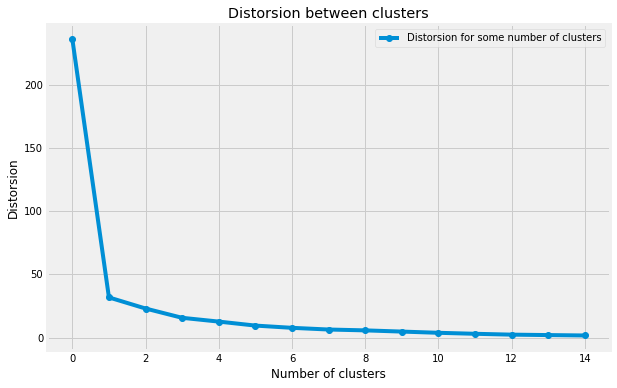

In [0]:
cluster_distorsion = []

for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(X_scaled)
    cluster_distorsion.append(test_sklearn.inertia_)
    
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

## 3.2 Clustering jerárquico

Veamos un ejemplo ahora de clustering jerárquico con la función AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) y su representación con un dendograma:

### Variables originales:

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat,Cluster_Kmeans,Cluster_Kmeans_scaled,Cluster_jerarquico
0,0,3,0,1,0,0,1,0,0,1,3
1,1,1,1,1,0,1,2,3,0,0,3
2,1,3,1,0,0,0,1,1,4,0,1
3,1,1,1,1,0,0,2,3,0,0,3
4,0,3,0,0,0,0,2,1,1,1,1


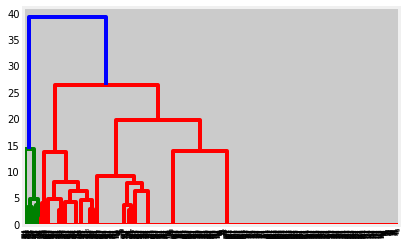

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

hc_fitted = hc.fit(X)

data['Cluster_jerarquico'] = hc_fitted.labels_
data.head()

### Variables reescaladas:

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat,Cluster_Kmeans,Cluster_Kmeans_scaled,Cluster_jerarquico,Cluster_jerarquico_scaled
0,0,3,0,1,0,0,1,0,0,1,3,0
1,1,1,1,1,0,1,2,3,0,0,3,3
2,1,3,1,0,0,0,1,1,4,0,1,3
3,1,1,1,1,0,0,2,3,0,0,3,3
4,0,3,0,0,0,0,2,1,1,1,1,0


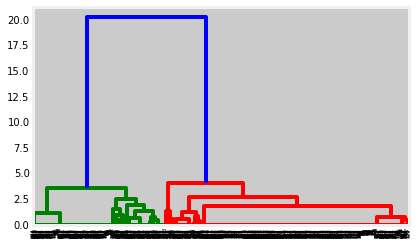

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

hc_fitted_rescaled = hc.fit(X_scaled)

data['Cluster_jerarquico_scaled'] = hc_fitted_rescaled.labels_
data.head()

## 3.3 DBSCAN:

También tenemos disponible el DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

### Variables originales:

In [0]:
dbscan = DBSCAN(eps=0.123, min_samples = 2)

dbscan_fitted = dbscan.fit(X)

In [0]:
data['Cluster_dbscan'] = dbscan_fitted.labels_
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat,Cluster_Kmeans,Cluster_Kmeans_scaled,Cluster_jerarquico,Cluster_jerarquico_scaled,Cluster_dbscan
0,0,3,0,1,0,0,1,0,0,1,3,0,0
1,1,1,1,1,0,1,2,3,0,0,3,3,1
2,1,3,1,0,0,0,1,1,4,0,1,3,2
3,1,1,1,1,0,0,2,3,0,0,3,3,1
4,0,3,0,0,0,0,2,1,1,1,1,0,3


### Variables reescaladas:

In [0]:
dbscan_fitted_scaled = dbscan.fit(X_scaled)

data['Cluster_dbscan_scaled'] = dbscan_fitted_scaled.labels_
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat,Cluster_Kmeans,Cluster_Kmeans_scaled,Cluster_jerarquico,Cluster_jerarquico_scaled,Cluster_dbscan,Cluster_dbscan_scaled
0,0,3,0,1,0,0,1,0,0,1,3,0,0,0
1,1,1,1,1,0,1,2,3,0,0,3,3,1,1
2,1,3,1,0,0,0,1,1,4,0,1,3,2,2
3,1,1,1,1,0,0,2,3,0,0,3,3,1,1
4,0,3,0,0,0,0,2,1,1,1,1,0,3,3


# Parte 4: Modelos de clasificación

In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### Partición train/test:

In [0]:
train,test=train_test_split(data,test_size=0.3,random_state=37,stratify=data['Survived'])

train_X=train[train.columns[1:]]
train_Y=train['Survived']

test_X=test[test.columns[1:]]
test_Y=test['Survived']

X=data[data.columns[1:]]
Y=data['Survived']

In [0]:
train_X_onehot = pd.get_dummies(train_X)

test_X_onehot = pd.get_dummies(test_X)

## 4.1 Regresión logística:

In [0]:
model = LogisticRegression()

model.fit(train_X_onehot,train_Y)

prediction1=model.predict(test_X_onehot)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Logistic Regression is 0.75


## 4.2 Árbol de decisión:

In [0]:
model=DecisionTreeClassifier()

model.fit(train_X_onehot,train_Y)

prediction2=model.predict(test_X_onehot)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction2,test_Y))

The accuracy of the Decision Tree is 0.7835820895522388


## 4.3 Naive Bayes:

In [0]:
model=GaussianNB()

model.fit(train_X_onehot,train_Y)

prediction3=model.predict(test_X_onehot)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the NaiveBayes is 0.6194029850746269


## 4.4 Random Forest:

In [0]:
model=RandomForestClassifier(n_estimators=500)

model.fit(train_X_onehot,train_Y)

prediction4=model.predict(test_X_onehot)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Random Forests is 0.7873134328358209


## 4.5 Xgboost:

In [0]:
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(train_X_onehot,train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
prediction5=model.predict(test_X_onehot)
print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the Gradient Boosting is 0.7798507462686567


In [0]:
prediction5_prob = model.predict_proba(test_X_onehot)

prediction5_prob = prediction5_prob[:,1]

prediction5_2 = prediction5_prob > 0.8

print('The accuracy of the Gradient Boosting is',metrics.accuracy_score(prediction5_2,test_Y))

The accuracy of the Gradient Boosting is 0.7611940298507462


# Parte 5: Medición

## 5.1 Matriz de confusión

In [0]:
pd.crosstab(prediction2,test_Y).style.background_gradient(cmap='summer_r')

## 5.2 AUC

In [0]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(test_Y, prediction5_2, pos_label=1)

metrics.auc(fpr, tpr)

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_Y, prediction5_2)